<h1>Introduction to Customer2Vec: Representation Learning for Customer Analytics and Personalization<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data description</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Data-Summary" data-toc-modified-id="Data-Summary-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Summary</a></span></li></ul></li><li><span><a href="#Using-Word2Vec-for-building-item2vec-model" data-toc-modified-id="Using-Word2Vec-for-building-item2vec-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using Word2Vec for building item2vec model</a></span><ul class="toc-item"><li><span><a href="#Preparing-sequence-data-for-Word2Vec" data-toc-modified-id="Preparing-sequence-data-for-Word2Vec-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preparing sequence data for Word2Vec</a></span></li><li><span><a href="#Train-Word2Vec-model" data-toc-modified-id="Train-Word2Vec-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train Word2Vec model</a></span></li><li><span><a href="#Examples-of-the-most-similar-product-based-on-cosine-distance-between-vector-representation-or-product" data-toc-modified-id="Examples-of-the-most-similar-product-based-on-cosine-distance-between-vector-representation-or-product-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Examples of the most similar product based on cosine distance between vector representation or product</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#TSNE-on-the-latent-space" data-toc-modified-id="TSNE-on-the-latent-space-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>TSNE on the latent space</a></span></li><li><span><a href="#SVD-on-the-latent-space" data-toc-modified-id="SVD-on-the-latent-space-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>SVD on the latent space</a></span></li><li><span><a href="#Neighbourhood-Components-Analysis" data-toc-modified-id="Neighbourhood-Components-Analysis-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Neighbourhood Components Analysis</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Clusterization" data-toc-modified-id="Clusterization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clusterization</a></span><ul class="toc-item"><li><span><a href="#Latent-space-of-vector-representation-was-obtained-by-Word2Vec" data-toc-modified-id="Latent-space-of-vector-representation-was-obtained-by-Word2Vec-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Latent space of vector representation was obtained by Word2Vec</a></span></li><li><span><a href="#Features-space-was-calculated-based-on-some-statistics-of-items-in-transactional-data" data-toc-modified-id="Features-space-was-calculated-based-on-some-statistics-of-items-in-transactional-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Features space was calculated based on some statistics of items in transactional data</a></span></li></ul></li><li><span><a href="#Using-Doc2Vec-for-building-customer2vec-model" data-toc-modified-id="Using-Doc2Vec-for-building-customer2vec-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using Doc2Vec for building customer2vec model</a></span><ul class="toc-item"><li><span><a href="#Preparing-sequence-data-for-Doc2Vec" data-toc-modified-id="Preparing-sequence-data-for-Doc2Vec-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preparing sequence data for Doc2Vec</a></span></li><li><span><a href="#Train-Doc2Vec-model" data-toc-modified-id="Train-Doc2Vec-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train Doc2Vec model</a></span></li><li><span><a href="#Examples-of-the-most-similar-product-based-on-cosine-distance-between-vector-representation-or-user" data-toc-modified-id="Examples-of-the-most-similar-product-based-on-cosine-distance-between-vector-representation-or-user-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Examples of the most similar product based on cosine distance between vector representation or user</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#TSNE-on-the-latent-space" data-toc-modified-id="TSNE-on-the-latent-space-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>TSNE on the latent space</a></span></li></ul></li></ul></li></ul></div>

# Data description

This is the first part of the tutorial focused on vector reprasantation of item and customer based on transactional data. We preprocess transaction data and apply NLP techniques for obtaining vector reprezentation of item in some latent space.

See this blog post for more details:

For experiment we use data from
1. Instacart kaggle : https://www.kaggle.com/c/instacart-market-basket-analysis#prizes
2. data dictionary : https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import numpy as np
import os
pd.options.display.max_rows = 20
%matplotlib inline

import glob
from IPython.display import display, HTML

def toReadable(v):
    value = round(v,2) if isinstance(v, float) else v

    if value < 1000:
        return str(value)
    elif value<1000000:
        return str(round(value/1000,1))+'K'
    elif value>=1000000:
        return str(round(value/1000000,1))+'M'
    return value

In [2]:
DATA_PATH = 'data'
files_list = glob.glob(f'{DATA_PATH}/*.csv')

files_list

['data/products.csv',
 'data/orders.csv',
 'data/order_products__train.csv',
 'data/departments.csv',
 'data/aisles.csv',
 'data/order_products__prior.csv',
 'data/sample_submission.csv']

In [3]:
data_dict = {}

for arg in files_list:
    print(f'\n\nReading: {arg}')
    data = pd.read_csv(arg)
    print(data.columns)
    print(data.info(null_counts=True))

    display(HTML(data.sample(min(10, len(data))).to_html()))
    for col in data.columns:
        print(f'\nColumn {col} has {data[col].nunique()} unique values')
        print(f"Example of values: {data[col].unique()[:10]}")
        
    display(HTML(data.describe().T.to_html()))

    data_dict[arg.split('.')[0].split('/')[-1]] = data
data_dict.keys()



Reading: data/products.csv
Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


,product_id,product_name,aisle_id,department_id
43158,43159,"Mineral Bath, Aromatherapy, Relaxing Lavender",25,11
1357,1358,Phillips Gourmet Portabella Mushroom,123,4
35725,35726,All Natural Clam Juice,95,15
29523,29524,Brown Rice Pasta Elbow,131,9
32272,32273,Roasted Mushroom 'N Spinach Ultra Thin Crust Pizza,79,1
48465,48466,100% Apple Juice Boxes,98,7
48850,48851,Reduced Fat Mozzarella & Cheddar Polly-O Cheese Twists,21,16
1899,1900,Bath Laponge,127,11
41847,41848,Carousel Party Sprinkles,97,13
33443,33444,Rocky Road Ice Cream Bars,37,1



Column product_id has 49688 unique values
Example of values: [ 1  2  3  4  5  6  7  8  9 10]

Column product_name has 49688 unique values
Example of values: ['Chocolate Sandwich Cookies' 'All-Seasons Salt'
 'Robust Golden Unsweetened Oolong Tea'
 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce'
 'Green Chile Anytime Sauce' 'Dry Nose Oil'
 'Pure Coconut Water With Orange' "Cut Russet Potatoes Steam N' Mash"
 'Light Strawberry Blueberry Yogurt'
 'Sparkling Orange Juice & Prickly Pear Beverage']

Column aisle_id has 134 unique values
Example of values: [ 61 104  94  38   5  11  98 116 120 115]

Column department_id has 21 unique values
Example of values: [19 13  7  1 11 16 17 18 12  9]


,count,mean,std,min,25%,50%,75%,max
product_id,49688.0,24844.500000,14343.834425,1.0,12422.75,24844.5,37266.25,49688.0
aisle_id,49688.0,67.769582,38.316162,1.0,35.00,69.0,100.00,134.0
department_id,49688.0,11.728687,5.850410,1.0,7.00,13.0,17.00,21.0




Reading: data/orders.csv
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3421083 non-null  int64  
 1   user_id                 3421083 non-null  int64  
 2   eval_set                3421083 non-null  object 
 3   order_number            3421083 non-null  int64  
 4   order_dow               3421083 non-null  int64  
 5   order_hour_of_day       3421083 non-null  int64  
 6   days_since_prior_order  3214874 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3227943,1447726,194587,prior,35,1,16,4.0
1009009,1799032,60628,prior,34,2,16,1.0
2825207,326108,170453,prior,8,0,15,4.0
629683,2411675,37935,prior,16,6,18,7.0
729554,1638159,43913,prior,1,3,10,NaN
586013,2221224,35310,prior,7,6,1,15.0
3009124,450909,181583,prior,1,6,21,NaN
2633107,1063435,158543,prior,21,4,13,5.0
1549011,2836114,93054,prior,9,0,13,9.0
3311271,2680054,199610,prior,12,3,12,19.0



Column order_id has 3421083 unique values
Example of values: [2539329 2398795  473747 2254736  431534 3367565  550135 3108588 2295261
 2550362]

Column user_id has 206209 unique values
Example of values: [ 1  2  3  4  5  6  7  8  9 10]

Column eval_set has 3 unique values
Example of values: ['prior' 'train' 'test']

Column order_number has 100 unique values
Example of values: [ 1  2  3  4  5  6  7  8  9 10]

Column order_dow has 7 unique values
Example of values: [2 3 4 1 5 0 6]

Column order_hour_of_day has 24 unique values
Example of values: [ 8  7 12 15  9 14 16 11 10 19]

Column days_since_prior_order has 31 unique values
Example of values: [nan 15. 21. 29. 28. 19. 20. 14.  0. 30.]


,count,mean,std,min,25%,50%,75%,max
order_id,3421083.0,1.710542e+06,987581.739823,1.0,855271.5,1710542.0,2565812.5,3421083.0
user_id,3421083.0,1.029782e+05,59533.717794,1.0,51394.0,102689.0,154385.0,206209.0
order_number,3421083.0,1.715486e+01,17.733164,1.0,5.0,11.0,23.0,100.0
order_dow,3421083.0,2.776219e+00,2.046829,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,3421083.0,1.345202e+01,4.226088,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,3214874.0,1.111484e+01,9.206737,0.0,4.0,7.0,15.0,30.0




Reading: data/order_products__train.csv
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
None


,order_id,product_id,add_to_cart_order,reordered
348850,850292,4462,17,1
160070,391224,4006,13,0
1192126,2945182,15100,7,1
1356414,3351111,25466,3,1
978421,2413192,4588,6,0
1179664,2913388,38504,2,0
643702,1584256,49241,10,1
524102,1287407,49191,1,1
211427,518471,2272,25,1
52264,128666,49439,2,1



Column order_id has 131209 unique values
Example of values: [  1  36  38  96  98 112 170 218 226 349]

Column product_id has 39123 unique values
Example of values: [49302 11109 10246 49683 43633 13176 47209 22035 39612 19660]

Column add_to_cart_order has 80 unique values
Example of values: [ 1  2  3  4  5  6  7  8  9 10]

Column reordered has 2 unique values
Example of values: [1 0]


,count,mean,std,min,25%,50%,75%,max
order_id,1384617.0,1.706298e+06,989732.648868,1.0,843370.0,1701880.0,2568023.0,3421070.0
product_id,1384617.0,2.555624e+04,14121.272449,1.0,13380.0,25298.0,37940.0,49688.0
add_to_cart_order,1384617.0,8.758044e+00,7.423936,1.0,3.0,7.0,12.0,80.0
reordered,1384617.0,5.985944e-01,0.490183,0.0,0.0,1.0,1.0,1.0




Reading: data/departments.csv
Index(['department_id', 'department'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


,department_id,department
19,20,deli
20,21,missing
10,11,personal care
12,13,pantry
7,8,pets
2,3,bakery
18,19,snacks
0,1,frozen
8,9,dry goods pasta
3,4,produce



Column department_id has 21 unique values
Example of values: [ 1  2  3  4  5  6  7  8  9 10]

Column department has 21 unique values
Example of values: ['frozen' 'other' 'bakery' 'produce' 'alcohol' 'international' 'beverages'
 'pets' 'dry goods pasta' 'bulk']


,count,mean,std,min,25%,50%,75%,max
department_id,21.0,11.0,6.204837,1.0,6.0,11.0,16.0,21.0




Reading: data/aisles.csv
Index(['aisle_id', 'aisle'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


,aisle_id,aisle
45,46,mint gum
59,60,trash bags liners
83,84,milk
24,25,soap
106,107,chips pretzels
3,4,instant foods
122,123,packaged vegetables fruits
39,40,dog food care
124,125,trail mix snack mix
2,3,energy granola bars



Column aisle_id has 134 unique values
Example of values: [ 1  2  3  4  5  6  7  8  9 10]

Column aisle has 134 unique values
Example of values: ['prepared soups salads' 'specialty cheeses' 'energy granola bars'
 'instant foods' 'marinades meat preparation' 'other' 'packaged meat'
 'bakery desserts' 'pasta sauce' 'kitchen supplies']


,count,mean,std,min,25%,50%,75%,max
aisle_id,134.0,67.5,38.826537,1.0,34.25,67.5,100.75,134.0




Reading: data/order_products__prior.csv
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           32434489 non-null  int64
 1   product_id         32434489 non-null  int64
 2   add_to_cart_order  32434489 non-null  int64
 3   reordered          32434489 non-null  int64
dtypes: int64(4)
memory usage: 989.8 MB
None


,order_id,product_id,add_to_cart_order,reordered
5122043,540680,12341,1,1
12793602,1350329,24852,1,1
11747916,1240312,23165,4,0
3991595,421161,18234,1,0
1579415,166466,43290,18,0
8986445,948737,32835,16,0
5838615,616304,19478,11,0
29298498,3089950,7503,6,0
27843126,2936152,26477,7,0
9739301,1028201,47683,22,0



Column order_id has 3214874 unique values
Example of values: [ 2  3  4  5  6  7  8  9 10 11]

Column product_id has 49677 unique values
Example of values: [33120 28985  9327 45918 30035 17794 40141  1819 43668 33754]

Column add_to_cart_order has 145 unique values
Example of values: [ 1  2  3  4  5  6  7  8  9 10]

Column reordered has 2 unique values
Example of values: [1 0]


,count,mean,std,min,25%,50%,75%,max
order_id,32434489.0,1.710749e+06,987300.696453,2.0,855943.0,1711048.0,2565514.0,3421083.0
product_id,32434489.0,2.557634e+04,14096.689090,1.0,13530.0,25256.0,37935.0,49688.0
add_to_cart_order,32434489.0,8.351076e+00,7.126671,1.0,3.0,6.0,11.0,145.0
reordered,32434489.0,5.896975e-01,0.491889,0.0,0.0,1.0,1.0,1.0




Reading: data/sample_submission.csv
Index(['order_id', 'products'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  75000 non-null  int64 
 1   products  75000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None


,order_id,products
9192,416506,39276 29259
60753,2769766,39276 29259
17789,811431,39276 29259
43816,2000697,39276 29259
38328,1748836,39276 29259
39657,1809090,39276 29259
57710,2630426,39276 29259
58109,2648458,39276 29259
20163,918627,39276 29259
14733,669019,39276 29259



Column order_id has 75000 unique values
Example of values: [ 17  34 137 182 257 313 353 386 414 418]

Column products has 1 unique values
Example of values: ['39276 29259']


,count,mean,std,min,25%,50%,75%,max
order_id,75000.0,1.709686e+06,987854.232983,17.0,855723.25,1710152.0,2562794.5,3421054.0


dict_keys(['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior', 'sample_submission'])

## Data Preparation

In [6]:
data_dict.keys()

dict_keys(['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior', 'sample_submission'])

In [7]:
order_product_cnt_ds = data_dict['order_products__prior'].groupby('order_id').count()[['product_id']]
order_product_cnt_ds.columns = ['product_cnt']

## join product count 
order_ds = data_dict['orders'].merge(order_product_cnt_ds, left_on='order_id', right_index=True)

order_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214874 entries, 0 to 3421081
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_cnt             int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 220.7+ MB


In [8]:
order_ds.sample(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_cnt
1026692,2182545,61723,prior,1,5,20,NaN,4
1028715,1555605,61871,prior,3,5,19,7.0,1
968635,455315,58159,prior,12,5,8,6.0,5
135019,2747343,8139,prior,1,6,22,NaN,10
786406,1861724,47295,prior,22,4,18,12.0,10


## Data Summary

In [9]:
total_user = len(order_ds.user_id.unique())
total_order = len(order_ds)
total_ordered_product = len(data_dict['order_products__prior'])
unique_products = len(data_dict['order_products__prior'].product_id.unique())

print("total user = {}".format(toReadable(total_user)))
print("total order = {} ({} orders per a user )".format(toReadable(total_order), toReadable(total_order/total_user) ))
print("total product = ", toReadable(unique_products))
print("total ordered product  = {} ({} orders per a product )".format(
    toReadable(total_ordered_product), toReadable(total_ordered_product/unique_products) ))

total user = 206.2K
total order = 3.2M (15.59 orders per a user )
total product =  49.7K
total ordered product  = 32.4M (652.91 orders per a product )


# Using Word2Vec for building item2vec model

## Preparing sequence data for Word2Vec

In [10]:
merge_order_product_ds = data_dict['order_products__prior'].merge(order_ds, on='order_id' )

print('Creating sequences based on transactions')
order_product_list = merge_order_product_ds\
    .sort_values(['user_id','order_id','add_to_cart_order'])[['order_id','product_id']]\
    .values.tolist()

print('Preparing corpus of items')
product_corpus = []
sentence = []
new_order_id = order_product_list[0][0]
for (order_id, product_id) in tqdm(order_product_list):
    if new_order_id != order_id:
        product_corpus.append(sentence)
        sentence = []
        new_order_id = order_id
    sentence.append(str(product_id))

Creating sequences based on transactions
Preparing corpus of items


In [11]:
len(order_product_list), order_product_list[:10]

(32434489,
 [[431534, 196],
  [431534, 12427],
  [431534, 10258],
  [431534, 25133],
  [431534, 10326],
  [431534, 17122],
  [431534, 41787],
  [431534, 13176],
  [473747, 196],
  [473747, 12427]])

In [12]:
len(product_corpus), product_corpus[:10]

(3214873,
 [['196', '12427', '10258', '25133', '10326', '17122', '41787', '13176'],
  ['196', '12427', '10258', '25133', '30450'],
  ['196', '10258', '12427', '25133', '13032'],
  ['196', '12427', '10258', '25133', '26405'],
  ['49235', '46149', '25133', '196', '10258', '12427'],
  ['196', '10258', '12427', '13176', '26088', '13032'],
  ['196', '14084', '12427', '26088', '26405'],
  ['196',
   '46149',
   '39657',
   '38928',
   '25133',
   '10258',
   '35951',
   '13032',
   '12427'],
  ['12427', '196', '10258', '25133', '46149', '49235'],
  ['196', '12427', '10258', '25133']])

## Train Word2Vec model

We use implementation from Gensim. Additionally we define the next parameters for a model:

1. sentences=product_corpus - The `sentences` iterable can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network.
2. window=5 - Maximum distance between the current and predicted word within a sentence.
3. size=200 - Dimensionality of the word vectors. 
4. workers=4 - Use these many worker threads to train the model (=faster training with multicore machines).
5. min_count=200 - Ignores all words with total frequency lower than this.

In [13]:
#please change if you need load ready model
TRAIN_ITEM_MODEL = True
MODEL_DIR = 'models'

if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

In [10]:
import multiprocessing as mp

print('Amount of CPU cores:', mp.cpu_count())

Amount of CPU cores: 16


In [15]:
from gensim.models import Word2Vec

if TRAIN_ITEM_MODEL:
    model = Word2Vec(product_corpus, 
                 window=5, 
                     size=300, 
                     workers=mp.cpu_count() - 2, 
                     min_count=100)
    
    model.save('models/item2vec.200d.model')
    print('Model saved!')
else:
    model = Word2Vec.load('models/item2vec.300d.model')
    print('Model loaded!')

Model saved!


## Examples of the most similar product based on cosine distance between vector representation or product

In [16]:
data_dict.keys()

dict_keys(['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior', 'sample_submission'])

In [17]:
def toProductName(id, columns='product_name'):
    return data_dict['products'][data_dict['products'].product_id==id][columns].values.tolist()[0]

def most_similar_readable(model, product_id, topn=10):
    similar_list = [(product_id, 1.0)] + model.wv.most_similar(str(product_id), topn=topn)
    
    return pd.DataFrame([( toProductName(int(id)), int(id), similarity ) for (id, similarity) in similar_list],
                        columns=['product', 'product_id', 'similarity'])

In [18]:
most_similar_readable(model, 13176)

,product,product_id,similarity
0,Bag of Organic Bananas,13176,1.000000
1,Organic Banana,37067,0.701092
2,Banana,24852,0.690455
3,Organic D'Anjou Pears,22825,0.482736
4,Organic Raspberries,27966,0.455925
5,Organic Bosc Pear,46969,0.455596
6,Organic Bartlett Pear,43122,0.447779
7,Organic Cripps Pink Apples,40723,0.438225
8,Organic Kiwi,39928,0.435467
9,Organic Green Seedless Grapes,38777,0.428314


In [19]:
most_similar_readable(model, 39180)

,product,product_id,similarity
0,Organic Lowfat 1% Milk,39180,1.000000
1,Organic Reduced Fat Milk,38689,0.794918
2,Organic Homestyle Waffles,25753,0.612037
3,Organic Multigrain Waffles,9825,0.604449
4,Organic Yokids Lemonade/Blueberry Variety Pack...,10761,0.592873
5,Organic Mini Homestyle Waffles,162,0.585348
6,Organic Whole Milk,27845,0.573441
7,Low Fat Vanilla Yogurt,30442,0.559146
8,Medium Cheddar Cheese Block,11068,0.557448
9,Organic Blueberry Waffles,2326,0.550998


In [20]:
most_similar_readable(model, 2326)

,product,product_id,similarity
0,Organic Blueberry Waffles,2326,1.000000
1,Organic Mini Homestyle Waffles,162,0.727276
2,Organic Multigrain Waffles,9825,0.722368
3,Organic Homestyle Waffles,25753,0.711219
4,Original Veggie Straws,34448,0.704360
5,Ice Cream Sandwiches Vanilla,38274,0.685865
6,Apple Cinnamon Instant Oatmeal,37464,0.673377
7,Four Cheese Thin Crust Pizza,5959,0.667927
8,Organic Cinnamon Apple Sauce,15995,0.652076
9,Baked Aged White Cheddar Rice and Corn Puffs,3599,0.635401


## Visualizations

### TSNE on the latent space 

In [21]:
vocab = list(model.wv.vocab.keys())


In [22]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

word_vectors = model.wv
vocab = list(model.wv.vocab.keys())
item2vector_dict = {arg:model.wv[arg] for arg in vocab}
# X = word_vectors.vectors
X = pd.DataFrame(item2vector_dict).T.values

X.shape, len(vocab), vocab[0]

((20067, 300), 20067, '196')

In [23]:
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(X, X, metric='cosine', n_jobs=-1)

tsne = TSNE(metric="precomputed", n_components=2, verbose=1, perplexity=30, n_iter=500)
tsne_results = tsne.fit_transform(distance_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20067 samples in 0.334s...
[t-SNE] Computed neighbors for 20067 samples in 9.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20067
[t-SNE] Computed conditional probabilities for sample 2000 / 20067
[t-SNE] Computed conditional probabilities for sample 3000 / 20067
[t-SNE] Computed conditional probabilities for sample 4000 / 20067
[t-SNE] Computed conditional probabilities for sample 5000 / 20067
[t-SNE] Computed conditional probabilities for sample 6000 / 20067
[t-SNE] Computed conditional probabilities for sample 7000 / 20067
[t-SNE] Computed conditional probabilities for sample 8000 / 20067
[t-SNE] Computed conditional probabilities for sample 9000 / 20067
[t-SNE] Computed conditional probabilities for sample 10000 / 20067
[t-SNE] Computed conditional probabilities for sample 11000 / 20067
[t-SNE] Computed conditional probabilities for sample 12000 / 20067
[t-SNE] Computed conditional probabilities for sam

In [24]:
df_subset = pd.DataFrame({'product_id': vocab})
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['product_id'] = df_subset['product_id'].astype(int)

df_subset = df_subset.merge(data_dict['products'], on='product_id',
                           how='left')
df_subset = df_subset.merge(data_dict['aisles'], on='aisle_id',
                           how='left')
df_subset = df_subset.merge(data_dict['departments'], on='department_id',
                           how='left')

df_subset.sample(5)

,product_id,tsne-2d-one,tsne-2d-two,product_name,aisle_id,department_id,aisle,department
15506,38308,-20.899414,11.521026,Arrabbiata Tomato & Red Pepper Italian Pasta S...,9,9,pasta sauce,dry goods pasta
556,6518,-3.652175,-24.881308,California Blend Vegetables,116,1,frozen produce,frozen
13025,40945,-12.167519,-7.993318,Baking Chopped Pecans,17,13,baking ingredients,pantry
7290,48777,3.321017,-3.254119,Pine Nuts Natural Unsalted,117,19,nuts seeds dried fruit,snacks
1576,41065,-16.605377,-3.454768,Organic Yellow Squash,83,4,fresh vegetables,produce


In [25]:
df_subset['aisle'].nunique(), df_subset['department'].nunique()

(134, 21)

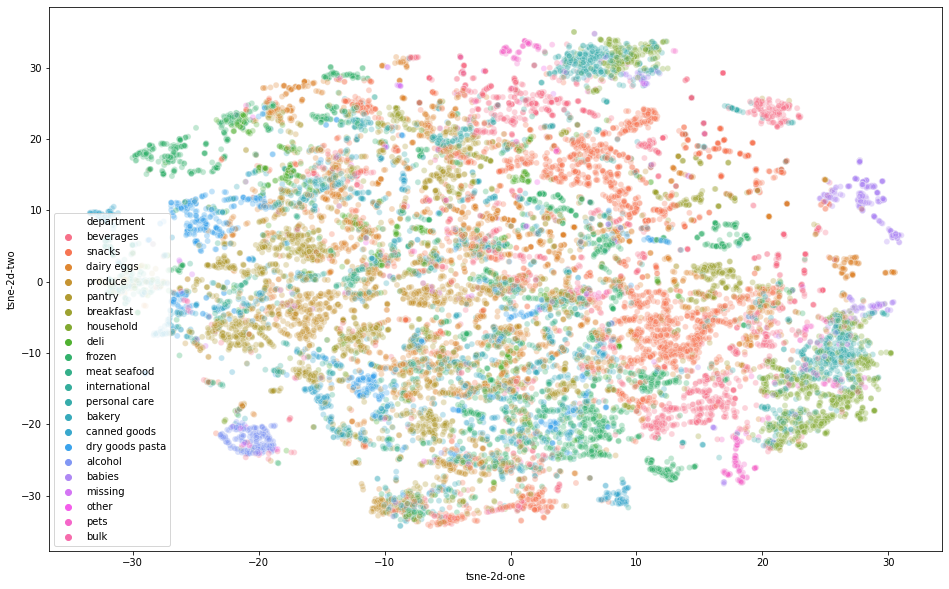

In [32]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='department',
    # palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.show()

(2706, 8)


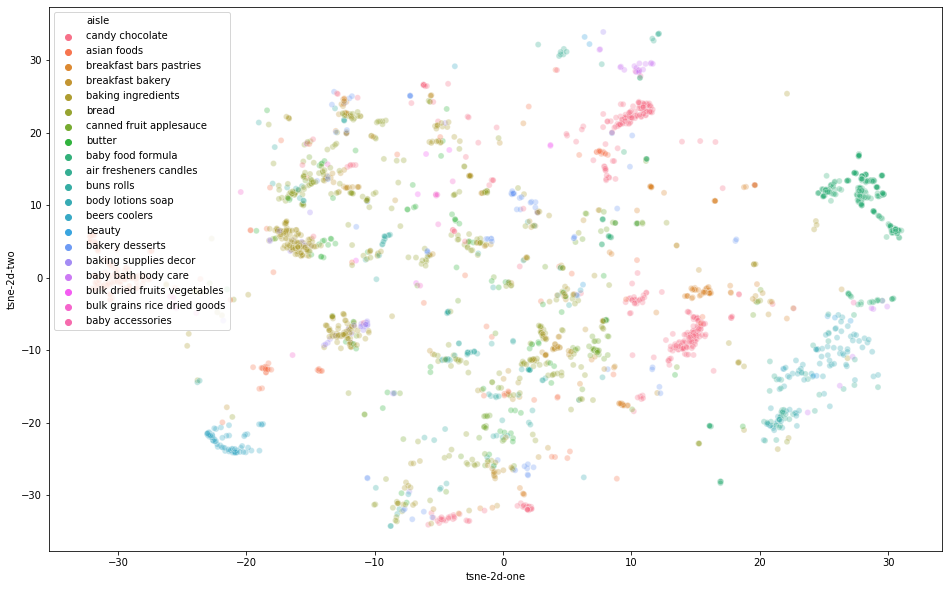

(3575, 8)


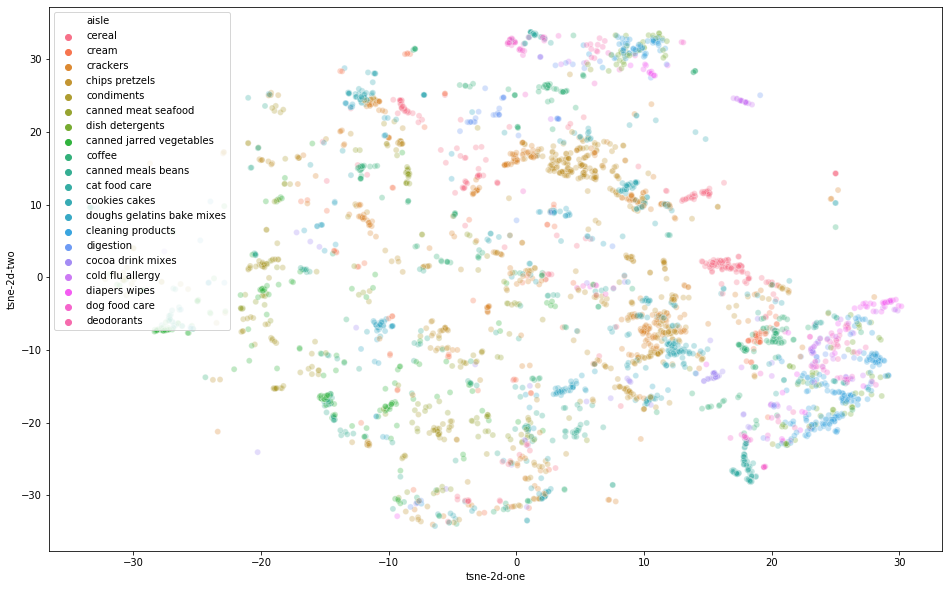

(2983, 8)


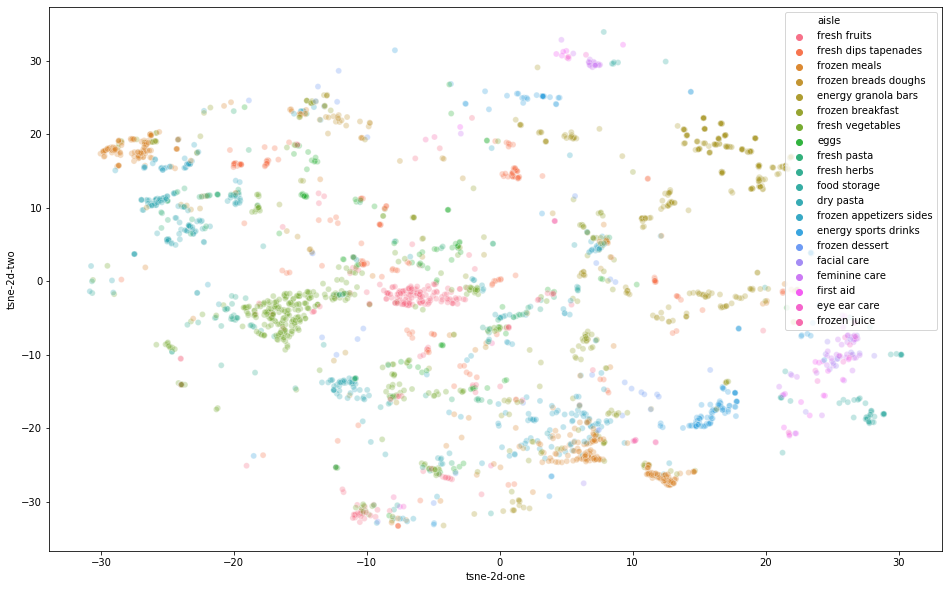

(3021, 8)


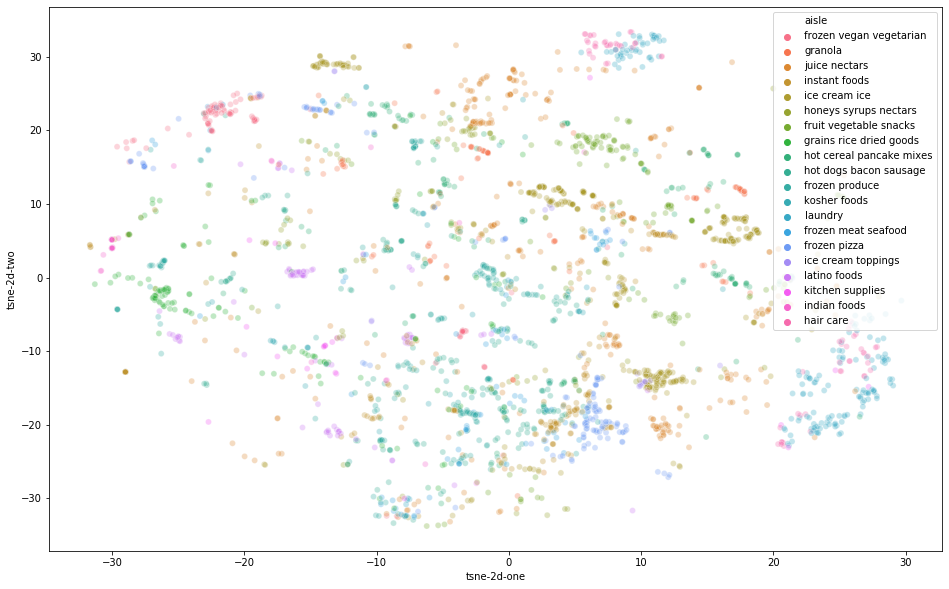

(2808, 8)


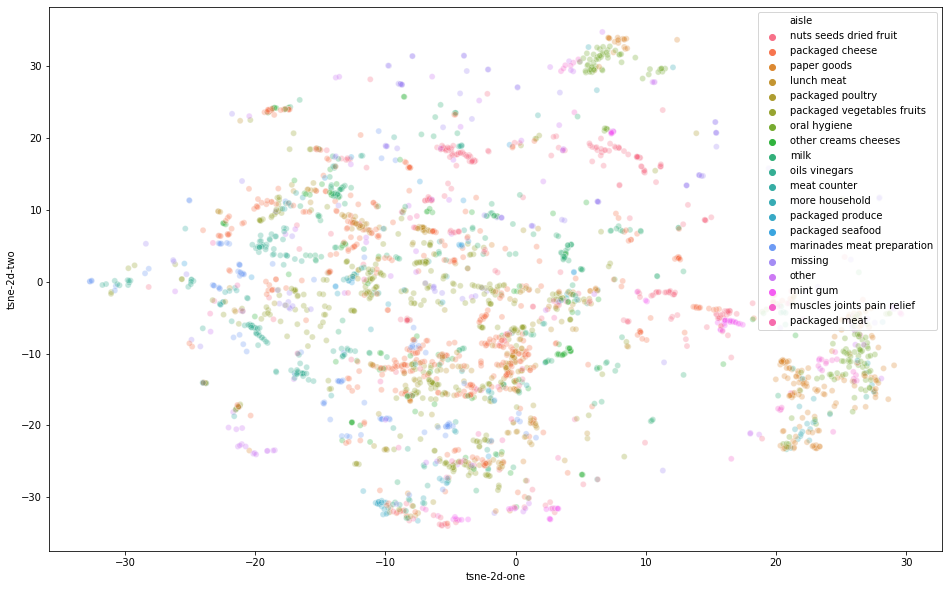

(2621, 8)


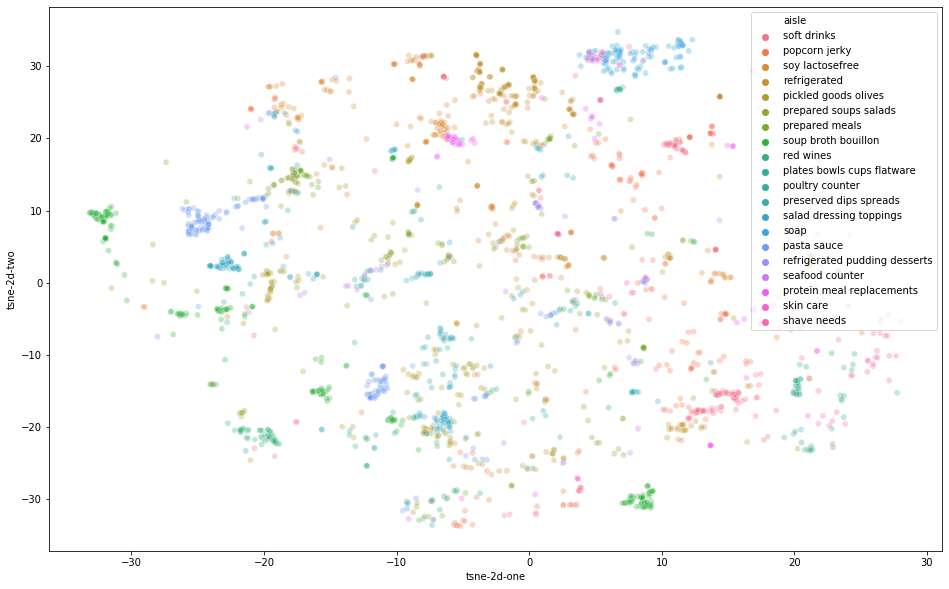

(2353, 8)


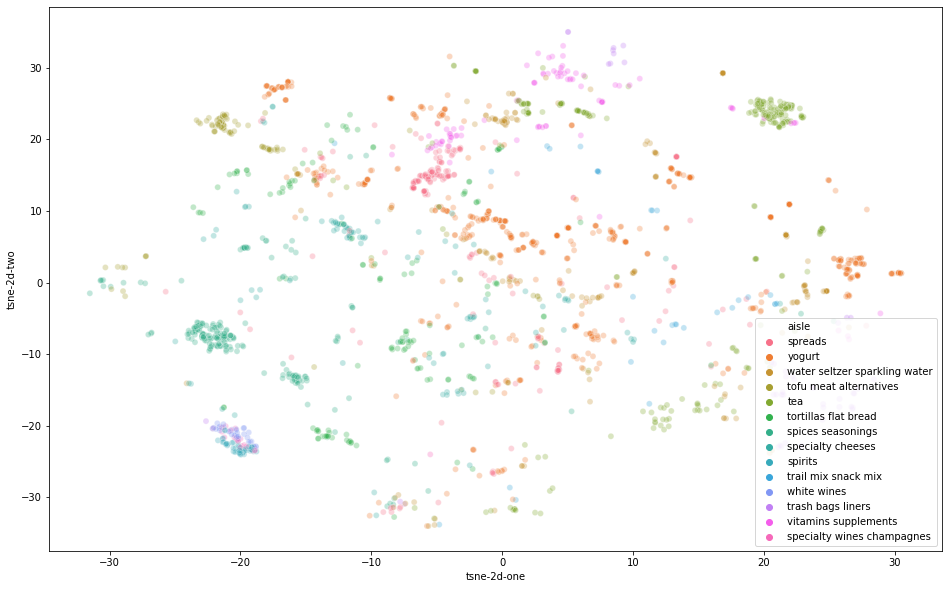

In [39]:
aisle_list = sorted(df_subset['aisle'].unique())

for arg in range(0, len(aisle_list), 20):
    print(df_subset[df_subset.aisle.isin(aisle_list[arg:(arg + 20)])].shape)
    
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue='aisle',
        # palette=sns.color_palette("hls", 10),
        data=df_subset[df_subset.aisle.isin(aisle_list[arg:(arg + 20)])],
        legend="full",
        alpha=0.3
    )
    plt.show()

### SVD on the latent space

In [27]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

In [28]:
df_svd = pd.DataFrame({'product_id': vocab})
df_svd['tsne-2d-one'] = X_reduced[:,0]
df_svd['tsne-2d-two'] = X_reduced[:,1]
df_svd['product_id'] = df_svd['product_id'].astype(int)

df_svd = df_svd.merge(data_dict['products'], on='product_id',
                           how='left')
df_svd = df_svd.merge(data_dict['aisles'], on='aisle_id',
                           how='left')
df_svd = df_svd.merge(data_dict['departments'], on='department_id',
                           how='left')

df_svd.sample(5)

,product_id,tsne-2d-one,tsne-2d-two,product_name,aisle_id,department_id,aisle,department
3242,15153,-0.832410,-1.425870,Blue Machine Boosted 100% Juice Smoothie,31,7,refrigerated,beverages
19640,14173,0.732272,-1.425043,Popped Corn Just The Caramel Corn,23,19,popcorn jerky,snacks
768,43409,-6.221354,-2.455902,Frosted Mini-Wheats Original Cereal,121,14,cereal,breakfast
832,9493,-5.243866,3.203204,Seasoned Croutons,89,13,salad dressing toppings,pantry
3963,22046,-3.193932,1.061952,Frozen Whole Strawberries,116,1,frozen produce,frozen


department


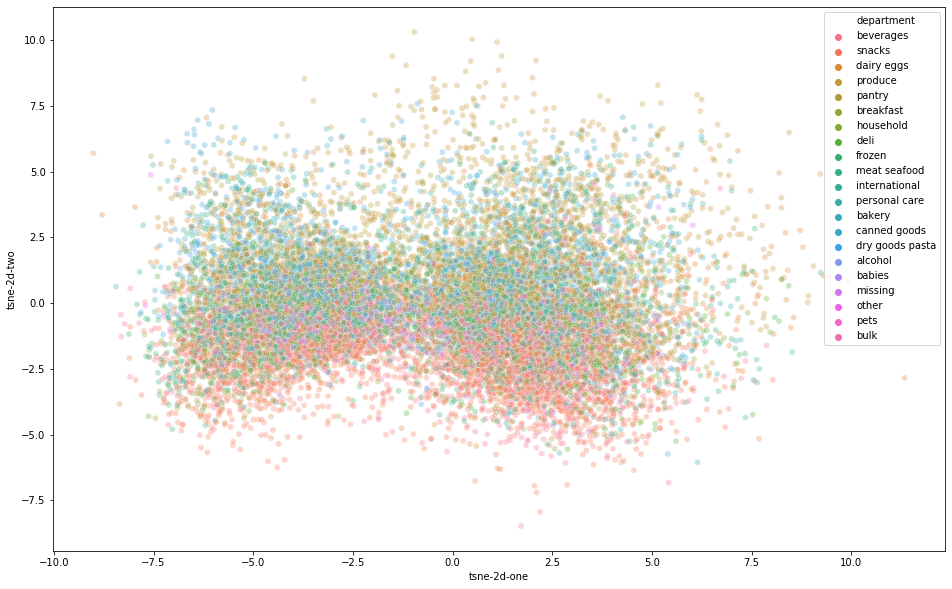

In [29]:
for arg in ['department']:
    print(arg)

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue=arg,
        # palette=sns.color_palette("hls", 10),
        data=df_svd,
        legend="full",
        alpha=0.3
    )
    plt.show()

### Neighbourhood Components Analysis

https://github.com/kevinzakka/nca

## Conclusions

As we can see from previous plot exists hierarchy in data (department and aisle) isn't give for us a good cluster structure of item's latent space, let's check it with calculation of silhouette score. 

Based on values of silhouette score we are able to make a conclusion that items is not well matched to its own cluster and well matched to neighboring clusters.

Let's try to find some clusters in item's latent space

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

for arg in ['department', 'aisle']:
    silhouette_avg = silhouette_score(tsne_results, df_subset[arg], metric="cosine")
    print(f"""Amount of unique categories for {arg} equal {df_subset[arg].nunique()}
        and the average silhouette_score on TSNE is : {silhouette_avg:.4}""")

Amount of unique categories for department equal 21
        and the average silhouette_score on TSNE is : -0.5424
Amount of unique categories for aisle equal 134
        and the average silhouette_score on TSNE is : -0.7559


In [31]:
for arg in ['department', 'aisle']:
    silhouette_avg = silhouette_score(model.wv.vectors, df_subset[arg], metric="cosine")
    print(f"""Amount of unique categories for {arg} equal {df_subset[arg].nunique()}
        and the average silhouette_score on the latent space is : {silhouette_avg:.4}""")

Amount of unique categories for department equal 21
        and the average silhouette_score on the latent space is : -0.05102
Amount of unique categories for aisle equal 134
        and the average silhouette_score on the latent space is : -0.1135


# Clusterization

## Latent space of vector representation was obtained by Word2Vec

In [195]:
from __future__ import division
import random
import numpy as np
from scipy.spatial.distance import cdist  # $scipy/spatial/distance.py
    # http://docs.scipy.org/doc/scipy/reference/spatial.html
from scipy.sparse import issparse  # $scipy/sparse/csr.py

__date__ = "2011-11-17 Nov denis"
    # X sparse, any cdist metric: real app ?
    # centres get dense rapidly, metrics in high dim hit distance whiteout
    # vs unsupervised / semi-supervised svm
#...............................................................................
def kmeans( X, centres, delta=.001, maxiter=10, metric="euclidean", p=2, verbose=1 ):
    """ centres, Xtocentre, distances = kmeans( X, initial centres ... )
    in:
        X N x dim  may be sparse
        centres k x dim: initial centres, e.g. random.sample( X, k )
        delta: relative error, iterate until the average distance to centres
            is within delta of the previous average distance
        maxiter
        metric: any of the 20-odd in scipy.spatial.distance
            "chebyshev" = max, "cityblock" = L1, "minkowski" with p=
            or a function( Xvec, centrevec ), e.g. Lqmetric below
        p: for minkowski metric -- local mod cdist for 0 < p < 1 too
        verbose: 0 silent, 2 prints running distances
    out:
        centres, k x dim
        Xtocentre: each X -> its nearest centre, ints N -> k
        distances, N
    see also: kmeanssample below, class Kmeans below.
    """
    if not issparse(X):
        X = np.asanyarray(X)  # ?
    centres = centres.todense() if issparse(centres) \
        else centres.copy()
    N, dim = X.shape
    k, cdim = centres.shape
    if dim != cdim:
        raise ValueError( "kmeans: X %s and centres %s must have the same number of columns" % (
            X.shape, centres.shape ))
    if verbose:
        print ("kmeans: X %s  centres %s  delta=%.2g  maxiter=%d  metric=%s" % (
            X.shape, centres.shape, delta, maxiter, metric) )
    allx = np.arange(N)
    prevdist = 0
    for jiter in range( 1, maxiter+1 ):
        D = cdist_sparse( X, centres, metric=metric, p=p )  # |X| x |centres|
        xtoc = D.argmin(axis=1)  # X -> nearest centre
        distances = D[allx,xtoc]
        avdist = distances.mean()  # median ?
        if verbose >= 2:
            print("kmeans: av |X - nearest centre| = %.4g" % avdist)
        if (1 - delta) * prevdist <= avdist <= prevdist \
        or jiter == maxiter:
            break
        prevdist = avdist
        for jc in range(k):  # (1 pass in C)
            c = np.where( xtoc == jc )[0]
            if len(c) > 0:
                centres[jc] = X[c].mean( axis=0 )
    if verbose:
        print ("kmeans: %d iterations  cluster sizes:" % jiter, np.bincount(xtoc))
    if verbose >= 2:
        r50 = np.zeros(k)
        r90 = np.zeros(k)
        for j in range(k):
            dist = distances[ xtoc == j ]
            if len(dist) > 0:
                r50[j], r90[j] = np.percentile( dist, (50, 90) )
        print ("kmeans: cluster 50 % radius", r50.astype(int))
        print ("kmeans: cluster 90 % radius", r90.astype(int))
            # scale L1 / dim, L2 / sqrt(dim) ?
    return centres, xtoc, distances
#...............................................................................
def kmeanssample( X, k, nsample=0, **kwargs ):
    """ 2-pass kmeans, fast for large N:
        1) kmeans a random sample of nsample ~ sqrt(N) from X
        2) full kmeans, starting from those centres
    """
        # merge w kmeans ? mttiw
        # v large N: sample N^1/2, N^1/2 of that
        # seed like sklearn ?
    N, dim = X.shape
    if nsample == 0:
        nsample = max( 2*np.sqrt(N), 10*k )
    Xsample = randomsample( X, int(nsample) )
    pass1centres = randomsample( X, int(k) )
    samplecentres = kmeans( Xsample, pass1centres, **kwargs )[0]
    return kmeans( X, samplecentres, **kwargs )

def cdist_sparse( X, Y, **kwargs ):
    """ -> |X| x |Y| cdist array, any cdist metric
        X or Y may be sparse -- best csr
    """
        # todense row at a time, v slow if both v sparse
    sxy = 2*issparse(X) + issparse(Y)
    if sxy == 0:
        return cdist( X, Y, **kwargs )
    d = np.empty( (X.shape[0], Y.shape[0]), np.float64 )
    if sxy == 2:
        for j, x in enumerate(X):
            d[j] = cdist( x.todense(), Y, **kwargs ) [0]
    elif sxy == 1:
        for k, y in enumerate(Y):
            d[:,k] = cdist( X, y.todense(), **kwargs ) [0]
    else:
        for j, x in enumerate(X):
            for k, y in enumerate(Y):
                d[j,k] = cdist( x.todense(), y.todense(), **kwargs ) [0]
    return d

def randomsample( X, n ):
    """ random.sample of the rows of X
        X may be sparse -- best csr
    """
    random.seed(100)    
    sampleix = random.sample( range( X.shape[0] ), int(n) )
    return X[sampleix]

def nearestcentres( X, centres, metric="euclidean", p=2 ):
    """ each X -> nearest centre, any metric
            euclidean2 (~ withinss) is more sensitive to outliers,
            cityblock (manhattan, L1) less sensitive
    """
    D = cdist( X, centres, metric=metric, p=p )  # |X| x |centres|
    return D.argmin(axis=1)

def Lqmetric( x, y=None, q=.5 ):
    # yes a metric, may increase weight of near matches; see ...
    return (np.abs(x - y) ** q) .mean() if y is not None \
        else (np.abs(x) ** q) .mean()

#...............................................................................
class Kmeans:
    """ km = Kmeans( X, k= or centres=, ... )
        in: either initial centres= for kmeans
            or k= [nsample=] for kmeanssample
        out: km.centres, km.Xtocentre, km.distances
        iterator:
            for jcentre, J in km:
                clustercentre = centres[jcentre]
                J indexes e.g. X[J], classes[J]
    """
    def __init__( self, X, k=0, centres=None, nsample=0, **kwargs ):
        self.X = X
        if centres is None:
            self.centres, self.Xtocentre, self.distances = kmeanssample(
                X, k=k, nsample=nsample, **kwargs )
        else:
            self.centres, self.Xtocentre, self.distances = kmeans(
                X, centres, **kwargs )

    def __iter__(self):
        for jc in range(len(self.centres)):
            yield jc, (self.Xtocentre == jc)

            
def clustering(model, k=500, delta=0.00000001, maxiter=200):
    movie_vec = model.wv.vectors
    centres, index2cid, dist = kmeanssample(movie_vec, k, 
                                                   metric = 'cosine', 
#                                                     metric='euclidean',
                                                   delta = delta, 
                                                   nsample = 0, maxiter = maxiter, verbose=False)
    clustered_ds = pd.DataFrame( [ (a, b, c) for a, b, c in zip(model.wv.index2word, index2cid, dist )],
                 columns=['product_id', 'cid', 'dist'] ).sort_values(['cid','dist'], ascending=True)

    prod2cid = { product_id:cid for product_id,cid in zip(model.wv.index2word, index2cid) }

    return (centres, index2cid, dist, clustered_ds, prod2cid)


def idToProductDesc(id):
    return data_dict['products'][data_dict['products'].product_id==id][['product_name','aisle_id']].values.tolist()[0]
    
def getProductNames(product_id_list):
    return [ idToProductDesc(int(product_id)) for  product_id in product_id_list ]

import urllib
def printClusterMembers(cluster_id, topn=10):
    members = getProductNames(clustered_ds[clustered_ds.cid==cluster_id].product_id[:topn].tolist())
    for member in members:
        print("{aisle} / {name} ".format( 
            aisle=member[1], name=member[0], q=urllib.parse.quote_plus(member[0]) ) 
        )

In [196]:
silhouette_list = []

for arg in tqdm(range(10,200,20)):
    print('\nAmount of clusters:', arg)
    (centres, index2cid, dist, clustered_ds, prod2cid) = clustering(model, k=arg)
#     clustered_ds.product_id = clustered_ds.product_id.apply(pd.to_numeric)
    printClusterMembers(1, topn=5)
    
    silhouette_avg = silhouette_score(model.wv.vectors, clustered_ds['cid'], metric="cosine")
    silhouette_list.append(silhouette_avg)
    print(f"""Silhouette_score is : {silhouette_avg:.4}""")


Amount of clusters: 10
22 / Extra Body Volumizing Shampoo 
4 / Hot & Spicy with Shrimp 
6 / White Zinfandel 
22 / Juicy Green Apple Shampoo 
107 / Party Size Cheese Flavored Snack Puffs 
Silhouette_score is : -0.04483

Amount of clusters: 30
69 / Unsalted Chicken Cooking Stock 
123 / Chunky Garlic Stir-In Paste 
89 / Zesty Italian Salad Dressing & Recipe Mix 
81 / No Salt Added Tomato Sauce 
5 / Garlic & Herb Bread Crumbs 
Silhouette_score is : -0.06465

Amount of clusters: 50
83 / Shallot 
83 / Fancy Eggplant 
83 / Fresh Parsnips 
83 / Fennel 
83 / Mini Italian Eggplant 
Silhouette_score is : -0.07165

Amount of clusters: 70
69 / Beef Cooking Stock 
19 / Sherry Cooking Wine 
72 / Reduced Sodium Worcestershire Sauce 
123 / Chunky Garlic Stir-In Paste 
69 / Fat Free Beef Broth 
Silhouette_score is : -0.07538

Amount of clusters: 90
69 / Beef Cooking Stock 
81 / Diced Fire Roasted W/Garlic Tomatoes 
81 / 100% Natural No Salt Diced Tomatoes 
69 / 100% Natural Beef Broth 
69 / Vegetable B

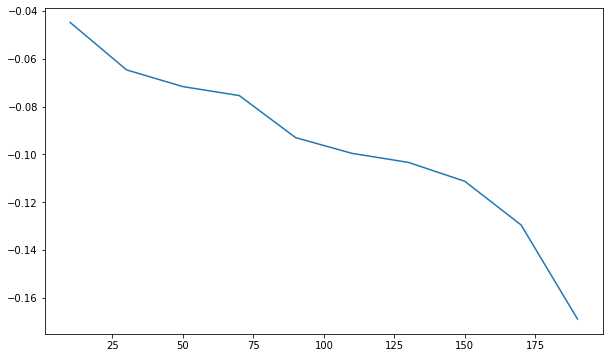

In [197]:
plt.figure(figsize=(10,6))
plt.plot(range(10,200,20), silhouette_list)

## Features space was calculated based on some statistics of items in transactional data

# Using Doc2Vec for building customer2vec model

## Preparing sequence data for Doc2Vec

In [4]:
train_orders = pd.read_csv("data/order_products__train.csv")
prior_orders = pd.read_csv("data/order_products__prior.csv")
products = pd.read_csv("data/products.csv").set_index('product_id')

orders = pd.read_csv("data/orders.csv")
prior_orders = prior_orders.merge(right=orders[['user_id','order_id','order_number']],on='order_id',how='left')

prior_orders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number
0,2,33120,1,1,202279,3
1,2,28985,2,1,202279,3
2,2,9327,3,0,202279,3
3,2,45918,4,1,202279,3
4,2,30035,5,0,202279,3


In [5]:
train_orders["product_id"] = train_orders["product_id"].astype(str)
prior_orders["product_id"] = prior_orders["product_id"].astype(str)

#This line is very important to make sense of users orders
prior_orders.sort_values(by=['user_id','order_number','add_to_cart_order'],inplace=True)

In [6]:
#train_products = train_orders.groupby("order_id").apply(lambda order: order['product_id'].tolist())
combined_orders_by_user_id = prior_orders.groupby("user_id").apply(lambda order: ' '.join(order['product_id'].tolist()))

combined_orders_by_user_id = pd.DataFrame(combined_orders_by_user_id,columns=['all_orders'])
print(combined_orders_by_user_id.shape)
combined_orders_by_user_id.reset_index(inplace=True)
combined_orders_by_user_id.user_id = combined_orders_by_user_id.user_id.astype(str)

combined_orders_by_user_id.head()

(206209, 1)


,user_id,all_orders
0,1,196 14084 12427 26088 26405 196 10258 12427 13...
1,2,32792 47766 20574 12000 48110 22474 16589 3591...
2,3,9387 17668 15143 16797 39190 47766 21903 39922...
3,4,36606 7350 35469 2707 42329 7160 1200 17769 43...
4,5,15349 21413 48775 28289 8518 11777 31717 26604...


In [7]:
combined_orders_by_user_id.iloc[0,1]

'196 14084 12427 26088 26405 196 10258 12427 13176 26088 13032 196 12427 10258 25133 30450 196 12427 10258 25133 26405 196 12427 10258 25133 10326 17122 41787 13176 196 12427 10258 25133 196 10258 12427 25133 13032 12427 196 10258 25133 46149 49235 49235 46149 25133 196 10258 12427 196 46149 39657 38928 25133 10258 35951 13032 12427'

## Train Doc2Vec model

We use implementation from Gensim. Additionally we define the next parameters for a model:

1. window=5 - Maximum distance between the current and predicted word within a sentence.
3. vector_size=200 - Dimensionality of the word vectors. 
4. workers=4 - Use these many worker threads to train the model (=faster training with multicore machines).
5. min_count=200 - Ignores all words with total frequency lower than this.

In [8]:
#please change if you need load ready model
TRAIN_USER_MODEL = False
MODEL_DIR = 'models'

if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

In [11]:
print('Amount of CPU cores:', mp.cpu_count())

Amount of CPU cores: 16


In [12]:
from gensim.models.doc2vec import LabeledSentence, TaggedDocument, Doc2Vec
import timeit
import gensim


if TRAIN_USER_MODEL:
    # This is the iterator approach

    dimension_size = 200

    class TaggedDocumentIterator(object):
        def __init__(self, df):
           self.df = df
        def __iter__(self):
            for row in self.df.itertuples():
                #yield LabeledSentence(words=dict(row._asdict())['all_orders'].split(),tags=[dict(row._asdict())['user_id']])
                yield TaggedDocument(words=dict(row._asdict())['all_orders'].split(),tags=[dict(row._asdict())['user_id']])

    it = TaggedDocumentIterator(combined_orders_by_user_id)

    doc_model = gensim.models.Doc2Vec(vector_size=dimension_size, window=5, 
                                  min_count=10, workers=mp.cpu_count(),
                                  alpha=0.055, min_alpha=0.055,
                                  epochs=120) # use fixed learning rate
    #doc_model = gensim.models.Doc2Vec(size=dimension_size, window=5, min_count=5,iter=10) # use fixed learning rate

    train_corpus = list(it)

    doc_model.build_vocab(train_corpus)

    for epoch in tqdm(range(10)):
        doc_model.alpha -= 0.005 # decrease the learning rate
        doc_model.min_alpha = doc_model.alpha # fix the learning rate, no deca
        doc_model.train(train_corpus,total_examples=doc_model.corpus_count,epochs=doc_model.iter)
        print('iteration:',epoch)

    doc_model.save(f'models/user2vec.{dimension_size}d.model')
    print('Model saved!')
else:
    doc_model = Doc2Vec.load('models/user2vec.model')
    print('Model loaded!')

Model loaded!


In [13]:
vocab_doc = list(doc_model.docvecs.doctags.keys())
doc_vector_dict = {arg:doc_model.docvecs[arg] for arg in vocab_doc}
X_doc = pd.DataFrame(doc_vector_dict).T.values

X_doc.shape, len(vocab_doc), prior_orders["user_id"].nunique()

((206209, 20), 206209, 206209)

In [21]:
doc_model.docvecs.vocab

{}

## Examples of the most similar product based on cosine distance between vector representation or user

In [30]:
test_user_id = '1'
print('Document:', combined_orders_by_user_id[combined_orders_by_user_id.user_id == test_user_id].iloc[0,1].split(' '))

for arg in doc_model.docvecs.most_similar(test_user_id):
    print('\nUser:', arg)
    print(combined_orders_by_user_id[combined_orders_by_user_id.user_id == '1'].iloc[0,1].split(' '))
    print('Intersection:', np.intersect1d(combined_orders_by_user_id[combined_orders_by_user_id.user_id == test_user_id].iloc[0,1].split(' '),
                        combined_orders_by_user_id[combined_orders_by_user_id.user_id == '1'].iloc[0,1].split(' ')))

Document: ['196', '14084', '12427', '26088', '26405', '196', '10258', '12427', '13176', '26088', '13032', '196', '12427', '10258', '25133', '30450', '196', '12427', '10258', '25133', '26405', '196', '12427', '10258', '25133', '10326', '17122', '41787', '13176', '196', '12427', '10258', '25133', '196', '10258', '12427', '25133', '13032', '12427', '196', '10258', '25133', '46149', '49235', '49235', '46149', '25133', '196', '10258', '12427', '196', '46149', '39657', '38928', '25133', '10258', '35951', '13032', '12427']

User: ('20755', 0.9357684850692749)
['196', '14084', '12427', '26088', '26405', '196', '10258', '12427', '13176', '26088', '13032', '196', '12427', '10258', '25133', '30450', '196', '12427', '10258', '25133', '26405', '196', '12427', '10258', '25133', '10326', '17122', '41787', '13176', '196', '12427', '10258', '25133', '196', '10258', '12427', '25133', '13032', '12427', '196', '10258', '25133', '46149', '49235', '49235', '46149', '25133', '196', '10258', '12427', '196', '

## Visualizations

### TSNE on the latent space 

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE

distance_matrix_doc = pairwise_distances(X_doc, X_doc, metric='cosine', n_jobs=-1)

tsne_doc = TSNE(metric="precomputed", n_components=2, verbose=1, perplexity=30, n_iter=500, n_jobs=-1)
tsne_results_doc = tsne_doc.fit_transform(distance_matrix_doc)

In [127]:
df_doc = pd.DataFrame({'product_id': vocab})
tsne_results_doc = tsne_doc.fit_transform(distance_matrix_doc)df_doc['tsne-2d-one'] = tsne_results_doc[:,0]
df_doc['tsne-2d-two'] = tsne_results[:,1]
df_doc['product_id'] = df_doc['product_id'].astype(int)

df_doc = df_doc.merge(data_dict['products'], on='product_id',
                           how='left')
df_doc = df_doc.merge(data_dict['aisles'], on='aisle_id',
                           how='left')
df_doc = df_doc.merge(data_dict['departments'], on='department_id',
                           how='left')

df_doc.sample(5)

,product_id,tsne-2d-one,tsne-2d-two,product_name,aisle_id,department_id,aisle,department
19550,46472,23.513540,21.311506,Pasteurized Cage Free Eggs,86,16,eggs,dairy eggs
10253,32980,-25.830137,11.065318,"Mini I.D.'s French Vanilla Creamer, Singles",53,16,cream,dairy eggs
11355,28572,9.289774,-2.714454,Premium Ice Cubes,37,1,ice cream ice,frozen
15936,1065,19.280302,-22.392290,Freshmints,46,19,mint gum,snacks
5998,31766,2.500697,-5.825240,Cheese Pizza Snacks,129,1,frozen appetizers sides,frozen


In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
#     hue=arg,
    # palette=sns.color_palette("hls", 10),
    data=df_doc,
    legend="full",
    alpha=0.3
)
plt.show()

NameError: name 'df_doc' is not defined

<Figure size 1152x720 with 0 Axes>